In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [2]:
n_bp = 12
length = 0.34 * n_bp
sequence = ['A']*n_bp
sequence = ''.join(['G', 'C', 'G', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'G', 'C'])

points = mdna.Shapes.line(length=length)
spline = mdna.SplineFrames(points)
print(spline.frames.shape)
generator = mdna.StructureGenerator(spline,sequence=sequence)
structure = generator.traj

(13, 4, 3)


/Users/thor/surfdrive/Projects/pymdna/pymdna/utils.py:84: RuntimeWarning: invalid value encountered in divide
  omega_normalized = np.where(omega_norm != 0, omega / omega_norm, omega)


In [3]:
view = nv.show_mdtraj(structure)
view.clear()
view.add_representation('ball+stick', selection='all')
view

NGLWidget()

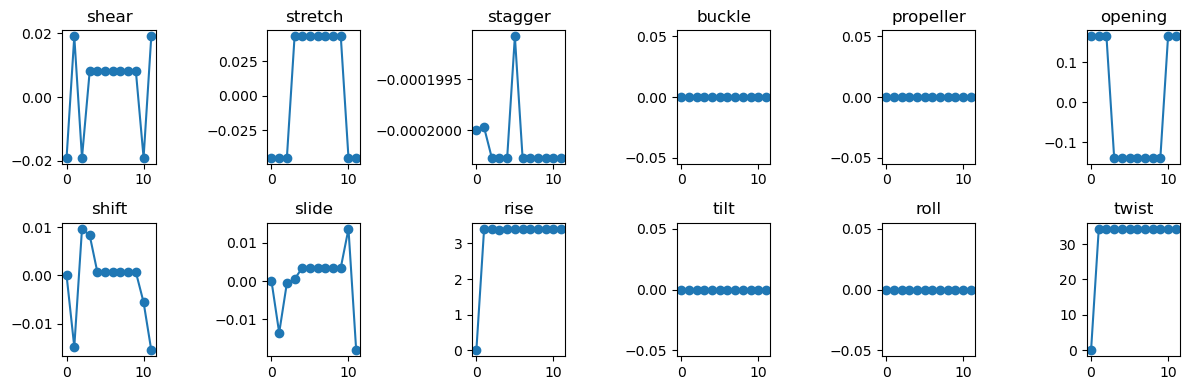

In [5]:
nuc = mdna.NucleicFrames(structure)
params, names = nuc.get_parameters()
params.shape, names

fig,ax = plt.subplots(2,6, figsize=[12,4])
ax = ax.flatten()
for _,name in enumerate(names):
    para = params[:,:,names.index(name)]
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].set_title(name)
    
fig.tight_layout()

In [6]:
bna = md.load('./1bna.pdb')
nuc_ = mdna.NucleicFrames(bna)
params_, names = nuc_.get_parameters()
params_.shape, names

((1, 12, 12),
 ['shear',
  'stretch',
  'stagger',
  'buckle',
  'propeller',
  'opening',
  'shift',
  'slide',
  'rise',
  'tilt',
  'roll',
  'twist'])

In [7]:
n = 7
sequence = {res.index:np.array([at.index for at in res._atoms]) for res  in bna.top._residues}
basepair = bna.atom_slice(np.concatenate((sequence[n],sequence[23-n])))
view = nv.show_mdtraj(basepair)
#view = nv.show_mdtraj(dna.atom_slice(dna.top.select('resid 2 3 21 20')))
#view = nv.show_mdtraj(dna)
view.clear()
# view.add_representation('cartoon', selection='backbone')
view.add_representation('ball+stick', selection='nucleic')
view

NGLWidget()

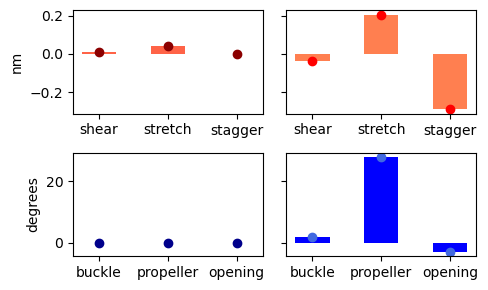

In [8]:
bpidx = 7
fig,ax=plt.subplots(2,2,figsize=(5,3),sharey='row')
ax = ax.flatten()
ax[1].bar(x=names[:3],height=params_[0][bpidx][:3],color='coral',width=0.5)
ax[1].scatter(x=names[:3],y=params_[0][bpidx][:3],color='r')
ax[0].bar(x=names[:3],height=params[0][bpidx][:3],color='tomato',width=0.5)
ax[0].scatter(x=names[:3],y=params[0][bpidx][:3],color='darkred')
ax[3].bar(x=names[3:6],height=params_[0][bpidx][3:6],color='b',width=0.5)
ax[3].scatter(x=names[3:6],y=params_[0][bpidx][3:6],color='royalblue')
ax[2].bar(x=names[3:6],height=params[0][bpidx][3:6],color='darkblue',width=0.5)
ax[2].scatter(x=names[3:6],y=params[0][bpidx][3:6],color='darkblue')
ax[0].set_ylabel('nm')
ax[2].set_ylabel('degrees')
fig.tight_layout()

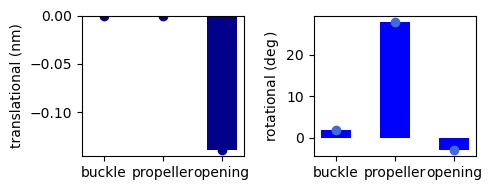

In [10]:
bpidx = 7
fig,ax=plt.subplots(1,2,figsize=(5,2))
ax = ax.flatten()
# ax[1].bar(x=names[:3],height=params_[0][bpidx][:3],color='coral',width=0.5)
# ax[1].scatter(x=names[:3],y=params_[0][bpidx][:3],color='r')
# ax[0].bar(x=names[:3],height=params[0][bpidx][:3],color='tomato',width=0.5)
# ax[0].scatter(x=names[:3],y=params[0][bpidx][:3],color='darkred')
ax[1].bar(x=names[3:6],height=params_[0][bpidx][3:6],color='b',width=0.5)
ax[1].scatter(x=names[3:6],y=params_[0][bpidx][3:6],color='royalblue')
ax[0].bar(x=names[3:6],height=params[0][bpidx][3:6],color='darkblue',width=0.5)
ax[0].scatter(x=names[3:6],y=params[0][bpidx][3:6],color='darkblue')
# ax[0].set_ylim(-0.5,0.5)
# ax[1].set_ylim(-30,10)
ax[0].set_ylabel('translational (nm)')
ax[1].set_ylabel('rotational ($\deg$)')
fig.tight_layout()

In [ ]:
# def do_pdbfix(structure_name):

#     fixer = PDBFixer(filename=f'{self.loc}{structure_name}.pdb')
    
#     # locate missing atoms/residues
#     fixer.findNonstandardResidues()
#     fixer.findMissingResidues()
#     fixer.findMissingAtoms()

#     for residue,atoms in fixer.missingAtoms.items():
#         print(residue,len(atoms),'atom(s) :\n', atoms,'\n')

#     # Add missing structure
#     fixer.replaceNonstandardResidues()
#     fixer.addMissingAtoms()
#     fixer.addMissingHydrogens(7.0)
#     if not self.fixed_only:
#         PDBFile.writeFile(fixer.topology, fixer.positions, open(f'{self.loc}{structure_name}_fixed.pdb', 'w'))
#     else:
#         PDBFile.writeFile(fixer.topology, fixer.positions, open(f'{self.loc}{structure_name}.pdb', 'w'))


In [ ]:
structure.save('/Users/thor/surfdrive/Projects/pymdna/examples/biomolsim/dna.pdb')